In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [33]:
def gen_sample_data():
    center_a = np.random.randint(1, 10, 2) + np.random.random(2)
    center_b = np.random.randint(15, 25, 2) + np.random.random(2)
    print('center point of a: {}, b:{}'.format(center_a, center_b))
        
    points_a = np.array([np.random.randint(-5, 5, 30) + np.random.random(30), 
                         np.random.randint(-5, 5, 30) + np.random.random(30)])
    points_a += center_a.reshape((2, 1))
    type_a = np.zeros((1, 30), dtype=np.int8)
    points_a = np.vstack((points_a, type_a))
    
    points_b = np.array([np.random.randint(-5, 5, 30) + np.random.random(30), 
                         np.random.randint(-5, 5, 30) + np.random.random(30)])
    points_b += center_b.reshape((2, 1))
    type_b = np.ones((1, 30), dtype=np.int8)
    points_b = np.vstack((points_b, type_b))
    return points_a, points_b

## Generate sample data

center point of a: [9.4177492  7.55129941], b:[24.20026861 15.92343276]


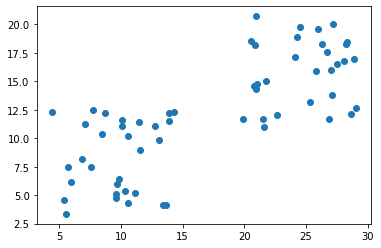

In [34]:
points_a, points_b = gen_sample_data()
points = np.concatenate((points_a, points_b), axis=1)
plt.scatter(points[0], points[1])

## 模型

In [151]:
def inference(x: np.ndarray, w: np.ndarray):
#     print(x.shape, w.shape)
    z = -w.dot(x)
    return 1 / (1 + (np.math.e)**z)

In [133]:
# inference(np.array([[1,2], [3,4]]), np.array([3,4]))

array([0.99999969, 1.        ])

## 损失函数

In [99]:
def loss_fun(index, gt):
    '''
    index: 指标，值在(0， 1)区间
    gt: 真实值0或者1
    '''
    if index == 0:
        index = 0.000001
    # 如果index逼近0，则为0类型，那么其损失为0，---即取1的对数
    if gt == 0:
        return -np.math.log(1 - index, 10)
    # 如果index逼近1，则为1类型，那么其损失为1，---即取1的对数
    elif gt == 1:
        return -np.math.log(index, 10)

## 梯度计算

In [100]:
def gradient(x: np.ndarray, w: np.ndarray, gt):
    '''
    gt: the real type of the data'''
#     print('x from gradient:', x)
    index = inference(x, w)
    e = np.math.e
    d_index: np.ndarray = -(index**2) * (e**(-x.dot(w))) * x 
    dw = (gt - 1) * d_index / (1- index) - gt * d_index / index
    return dw

In [101]:
# Test gradient compute
# x = np.array([1,2])
# w = np.array([3, 4])
# gradient(x, w, 1)

In [160]:
def cal_step_gradient(x: np.ndarray, gt: np.ndarray,
                      w, learing_rate):
    '''
    gt: ground truth
    '''
    indexes: np.ndarray = inference(x, w)
    e = np.math.e
    d_index: np.ndarray = -(indexes**2) * (e**(-w.dot(x))) * x 
    dw_total: np.ndarray = (gt - 1) * d_index / (1- index) - gt * d_index / index
    print('dw_total:', dw_total)
    return dw_total.mean() * learing_rate

In [161]:
def train(data: np.ndarray, ground_truth:np.ndarray, 
                      batch_size: int, learning_rate=0.0001, max_iterations=30):
    w = np.zeros(len(data[0]))
    for i in range(max_iterations):
        ids = np.random.choice(len(data), batch_size)
        batch_data = data[ids]
        batch_truth = ground_truth[ids]
        w += cal_step_gradient(batch_data, batch_truth, w, learning_rate)
        # 用w绘制分割边界，此处为2维，则是一条直线
#         x_points = np.linspace(0, 30)
#         y_points = x_points*w[0] + w[1]
        
        indexes = inference(batch_data, w)
        loss = np.vectorize(loss_fun)(indexes, batch_truth).mean()
        print('weights: {}, loss:{}'.format(len(w), loss))

In [162]:
# cordinates = points[:2].reshape(
#     (len(points[0]), 2)
# )
# print(cordinates)
train(points[:2], points[2], 60, 0.00001, 30)

dw_total: [[ 2.83158186  6.67877558  4.4450036  ... 13.29287588 13.74904937
  12.41233201]
 [ 2.83158186  6.67877558  4.4450036  ... 13.29287588 13.74904937
  12.41233201]
 [ 1.72283712  5.05608214  6.25498203 ...  9.99777221  5.98864919
   9.67278631]
 ...
 [ 2.83158186  6.67877558  4.4450036  ... 13.29287588 13.74904937
  12.41233201]
 [ 1.72283712  5.05608214  6.25498203 ...  9.99777221  5.98864919
   9.67278631]
 [ 1.72283712  5.05608214  6.25498203 ...  9.99777221  5.98864919
   9.67278631]]
weights: 60, loss:0.31569727709400347
dw_total: [[ 1.72268     5.05288521  6.25126473 ...  9.97293393  5.9790369
   9.65101999]
 [ 2.83132363  6.67455263  4.44236196 ... 13.25985131 13.72698099
  12.38440099]
 [ 2.83132363  6.67455263  4.44236196 ... 13.25985131 13.72698099
  12.38440099]
 ...
 [ 1.72268     5.05288521  6.25126473 ...  9.97293393  5.9790369
   9.65101999]
 [ 1.72268     5.05288521  6.25126473 ...  9.97293393  5.9790369
   9.65101999]
 [ 2.83132363  6.67455263  4.44236196 ... 1

In [120]:
index1 = inference(np.array([5, 5]), np.array([0.00223585, 0.00223703]))
print(index1, loss_fun(index1, 0))
print(index1, loss_fun(index1, 1))

index2 = inference(np.array([25, 20]), np.array([0.00223585, 0.00223703]))
print(index2, loss_fun(index2, 1))
print(index2, loss_fun(index2, 0))

0.5055908669716312 0.30591351529143257
0.5055908669716312 0.2962007797803554
0.5251380000783791 0.2797265541234673
0.5251380000783791 0.32343258275459247
